# Forme d'une corde pesante

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import minimize, brentq

## Préliminaires

On définit ici la longueur et l'énergie gravitationnelle d'une configuration discrétisée de la corde $(h_i)$. Le nombre de points de la corde est arbitraire. Avec $N$ points, la distance entre deux points dans la direction $x$ est $\delta x=1/(N-1)$, et la longueur de la corde est donnée par
$$L=\sum_{i=1}^{N-1} \sqrt{\delta x^2+(h_{i+1}-h_i)^2}.$$

In [3]:
def length(h) :
    N = len(h)
    hc = zeros(N+2)
    hc[1:-1] = h
    dx = 1./(N+1.)
    l = sqrt(dx**2*ones(N+1) + (hc[:-1]-hc[1:])**2)
    return sum(l)

Pour l'énergie gravitationnelle, on procède comme pour la longueur, en prenant la hauteur moyenne de chaque segment :
$$E_g=\sum_{i=1}^{N-1} \sqrt{\delta x^2+(h_{i+1}-h_i)^2}\times\frac{h_{i+1}+h_i}{2}.$$

In [4]:
def grav_energy (h) :
    N = len(h)
    hc = zeros(N+2)
    hc[1:-1] = h
    dx = 1./(N+1.)
    hm = (hc[:-1]+hc[1:])/2
    l = sqrt(dx**2*ones(N+1) + (hc[:-1]-hc[1:])**2)
    return sum(l*hm)

In [5]:
def plot_sol (h) :
    N = len(h)
    hc = zeros(N+2)
    hc[1:-1] = h
    dx = 1./(N+1.)
    x = dx * arange(N+2)
    plot(x,hc,'o',label="minimisation de l'énergie")
    return 1


## Corde pesante sous tension

La forme de la corde pesante sous une tension $T$ est obtenue en minimisant l'énergie gravitationnelle plus une énergie potentielle $E=E_g+T L$.

On utilise la fonction « minimize » pour minimiser l'énergie de la hauteur discrétisée.

In [123]:
tension=1
N=16
sol1 = minimize(lambda x: grav_energy(x) + tension*length(x), zeros(N))

La forme théorique est donnée par $$h(x)=A \mathrm{ch}\left(\frac{x-1/2}{A}\right)-T,$$
où $A$ est solution de 
$$A \mathrm{ch}\left(\frac{1}{2A}\right)=T.$$
On détermine $A$ à l'aide de la fonction « brentq ».

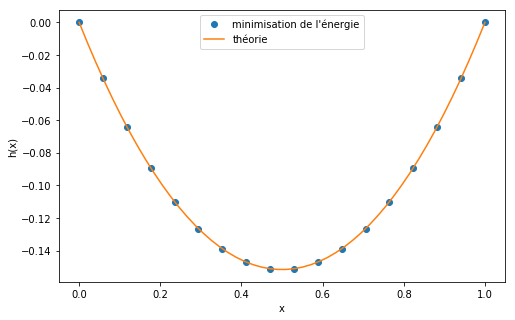

In [124]:
amax = .416
a = brentq(lambda x: x*cosh(1/(2.*x))-tension, amax, 100)

figsize(8,5)
plot_sol(sol1.x)
X = linspace(0,1)
plot(X,a*cosh((X-.5)/a)-tension,label='théorie')

xlabel('x')
ylabel('h(x)')
legend(loc=0)

## Corde pesante à longueur imposée

La forme de la corde pesante à longueur imposée est obtenue en minimisant l'énergie gravitationnelle $E_g$ sous la contrainte $L=L_0$. 

La fonction « minimize » avec la méthode 'SLSQP' permet de réaliser une minimisation sous contrainte.

In [111]:
L0 = 12
N = 16
h0 = -((L0-1)/2.)*ones(N)
cons = ({'type':'eq', 'fun': lambda x: length(x)-L0})
sol2 = minimize(lambda x: grav_energy(x), h0, method='SLSQP', constraints=cons)

La forme théorique est donnée par $$h(x)=A \left[\mathrm{ch}\left(\frac{x-1/2}{A}\right)-\mathrm{ch}\left(\frac{1}{2A}\right)\right],$$
où $A$ est solution de 
$$2A \mathrm{sh}\left(\frac{1}{2A}\right)=L_0.$$

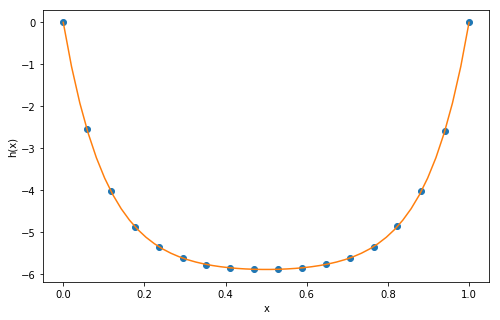

In [112]:
a = brentq(lambda x: 2*x*sinh(1/(2.*x))-L0, 0.01, 100.)
plot_sol(sol2.x)
X = linspace(0,1)
plot(X,a*(cosh((X-.5)/a)-cosh(.5/a)))

xlabel('x')
ylabel('h(x)')
show()

On peut tracer sur le même graphe la solution pour différentes valeurs de la longueur.

In [8]:
LL0 = [2,4,8,16]
N = 16
sols = []
for L0 in LL0 :
    h0 = -((L0-1)/2.)*ones(N)
    cons = ({'type':'eq', 'fun': lambda x: length(x)-L0})
    sols.append(minimize(lambda x: grav_energy(x), h0, method='SLSQP', constraints=cons))

In [10]:
A = []
for L0 in LL0 :
    A.append(brentq(lambda x: 2*x*sinh(1/(2.*x))-L0, 0.01, 100.))

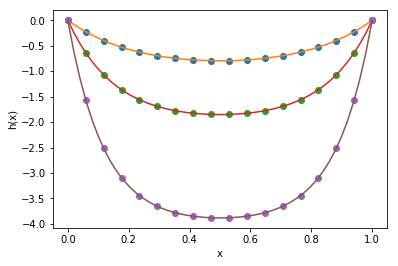

In [12]:
X = linspace(0,1)

for i in range(len(LL0)-1) :
    plot_sol(sols[i].x)
    a = A[i]
    plot(X,a*(cosh((X-.5)/a)-cosh(.5/a)))

xlabel('x')
ylabel('h(x)')
show()